
## IMDB Reviews Classification: Negative vs Positive

### **Objective:**
The goal is to classify IMDB movie reviews as either **negative (0)** or **positive (1)** based on their content.

### **Approach:**

1. **Data Encoding:**
   Each review is encoded as a **list of word indices**, where each word in the review is mapped to a unique integer. These indices correspond to words in a predefined vocabulary that is built from the dataset. The reviews are thus transformed into sequences of integers, where each integer represents a word.

2. **Label Encoding:**
   The labels for each review are encoded as:
   - `0` for **negative** reviews.
   - `1` for **positive** reviews.



In [5]:
 import tensorflow as tf
 import numpy as np
 from tensorflow import keras
 from tensorflow.keras.datasets import imdb

In [12]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # num_words=10000 means we retain only the top 10,000 most frequent words

In [16]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
# Encode the dataset into shape (25000, 10000), where each review is encoded as a sparse vector.
# The vector has a 1 at the position corresponding to a word in the dictionary if it exists in the review,
# and 0 if the word is not present in the review.

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range (len(sequences)):
    for j in range (len(sequences[i])):
      results[i][sequences[i][j]] = 1.
  return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train.shape

(25000, 10000)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [24]:
 from tensorflow.keras import Sequential
 from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - acc: 0.7187 - loss: 0.5965 - val_acc: 0.8577 - val_loss: 0.4105
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - acc: 0.8889 - loss: 0.3534 - val_acc: 0.8474 - val_loss: 0.3660
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.9130 - loss: 0.2577 - val_acc: 0.8890 - val_loss: 0.2878
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.9365 - loss: 0.1998 - val_acc: 0.8876 - val_loss: 0.2772
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9426 - loss: 0.1677 - val_acc: 0.8807 - val_loss: 0.2903
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9553 - loss: 0.1416 - val_acc: 0.8791 - val_loss: 0.2966
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - acc: 0.9641 - loss: 0.1171 - val_acc: 0.8838 - val_loss: 0.2936
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.9705 - loss: 0.1025 - val_acc: 0.8836 - val_loss: 0.3118
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.97

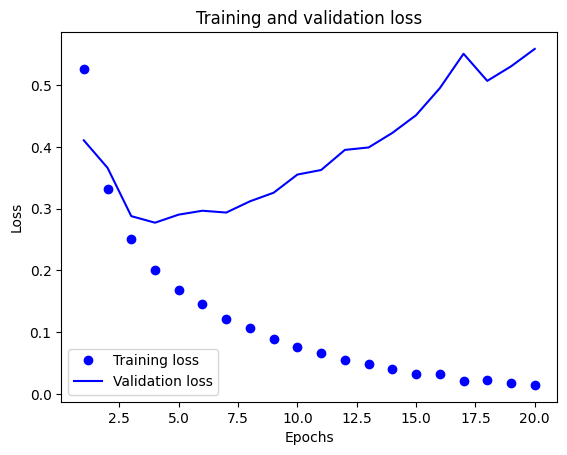

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
